In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

Ths problem has been treated by hand and the PDF is in the folder. Sorry, I could'nt cpoy it here on time!

# Problem 2

The code below is based on the one that Jon gave us in the class. It has been changed to fit the condition on the Green function, and to change the way it uses the mask.

In [2]:
def greens(n,ndim=2):
    dx=np.arange(n)
    dx[n//2:]=dx[n//2:]-n
    if ndim==2:
        pot=np.zeros([n,n])
        xmat,ymat=np.meshgrid(dx,dx)
        dr=np.sqrt(xmat**2+ymat**2)
        dr[0,0]=1 
        pot=np.log(dr)
        pot[0,0]=4*pot[1,0]-pot[2,0]-pot[1,1]-pot[1,-1]
        return pot/pot[0,0]

In [3]:
def rho2pot(rho,kernelft):
    tmp=rho.copy()
    tmp=np.pad(tmp,(0,tmp.shape[0]),mode='constant')

    tmpft=np.fft.rfftn(tmp)
    tmp=np.fft.irfftn(tmpft*kernelft)
    if len(rho.shape)==2:
        tmp=tmp[:rho.shape[0],:rho.shape[1]]
        return tmp
    print("error in rho2pot - unexpected number of dimensions")
    assert(1==0)

In [4]:
def rho2pot_masked(rho,mask,kernelft,return_mat=False):
    rhomat=np.zeros(mask.shape)
    rhomat=rho*mask    
    potmat=rho2pot(rhomat,kernelft)
    if return_mat:
        return potmat
    else:
        return potmat*mask

In [5]:
def cg(rhs,x0,mask,kernelft,niter,fun=rho2pot_masked,show_steps=False,step_pause=0.01):

    Ax=fun(x0,mask,kernelft)
    r=rhs-Ax
    p=r.copy()
    x=x0.copy()
    rsqr=np.sum(r*r)
    print('starting rsqr is ',rsqr)
    for k in range(niter):
        #Ap=ax_2d(p,mask)
        Ap=fun(p,mask,kernelft)
        alpha=np.sum(r*r)/np.sum(Ap*p)
        x=x+alpha*p
        if show_steps:            
            tmp=fun(x,mask,kernelft,True)
#            plt.clf();
#            plt.imshow(tmp)#,vmin=-2.1,vmax=2.1)
#            plt.colorbar()
            plt.pause(step_pause)
        r=r-alpha*Ap
        rsqr_new=np.sum(r*r)
        beta=rsqr_new/rsqr
        p=r+beta*p
        rsqr=rsqr_new
    print('final rsqr is ',rsqr)
    return x

In [6]:
def get_rhs(pot):
    tot=0
    ndim=len(pot.shape)
    for dim in range(ndim):
        tot=tot+np.roll(pot,1,dim)
        tot=tot+np.roll(pot,-1,dim)
    return tot
def get_rho(pot):
    tmp=get_rhs(pot)
    return 4*pot-tmp
plt.ion()

In [19]:
n=128
bc=np.zeros([n,n])
mask=np.zeros([n,n],dtype='bool')
n1=11*n//32
n2=n-n1
mask[:,:]=True
bc[n1:n2,n1:n2]=1
kernel=greens(2*n,2)
kernelft=np.fft.rfft2(kernel)
rhs=bc*mask
x0=0*rhs

In [20]:
rho_out=cg(rhs,x0,mask,kernelft,128,show_steps=True,step_pause=0.25)
pot=rho2pot_masked(rho_out,mask,kernelft,True)

starting rsqr is  1600.0
final rsqr is  0.0004946055120882238


## Results - part a)
Here I show a Green function obtained using the code above. The values at (1,0), (2,0) and (5,0) have also been extracted from the function.

The value of V(1,0) is  -0.0
The value of V(2,0) is  -0.49999999999999994
The value of V(5,0) is  -1.1609640474436809


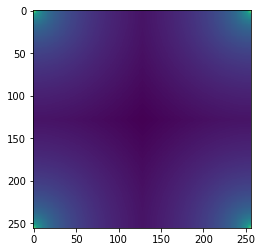

In [25]:
#plt.imshow(kernel)
print('The value of V(1,0) is ',kernel[1,0])
print('The value of V(2,0) is ',kernel[2,0])
print('The value of V(5,0) is ',kernel[5,0])

## Results part b)
Here I show the charge density on the top side of the box that I used. For the constraints, I used V=1 everywhere on the box, as specified, but I also used V=0 everywhere outside, which was not specified.

Text(0.5, 1.0, 'Top side of the box')

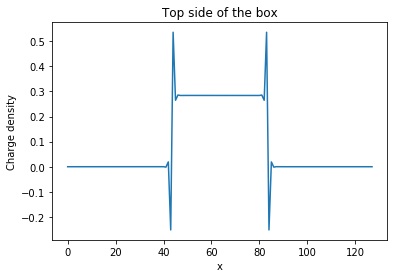

In [26]:
plt.plot(rho_out[:,n1])
plt.xlabel('x')
plt.ylabel('Charge density')
plt.title('Top side of the box')

## Results - part c)
Here I show the potential that I derived from the charge distribution, using the convolution with the Green function. I also show that the difference between the expected value and the obtained one is small, through the mean and the standard deviation. I didn't have the time to generate the field, so I don't have any results concerning that :-(

The mean potential on the square is  0.9999656009358836 , and the standard deviation is 4.632170522934719e-05


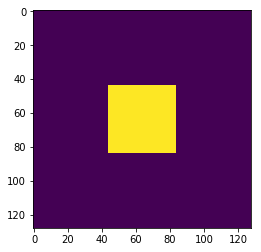

In [23]:
plt.imshow(pot)
std=np.std(pot[n1:n2,n1:n2])
mean=np.mean(pot[n1:n2,n1:n2])
print('The mean potential on the square is ',mean,', and the standard deviation is',std)